In [1]:
MASTER_PATH = "/mnt/4TBSSD/ntnhu/"
DISK_PATH = "/mnt/shared_48tb/"
VBS_PATH = "vbs"
MARINE_PATH = "marine"
MARINE_VIDEO_PATH = "extracted/MarineVideoKit"
V3C_KEYFRAME_DATA_PATH = "VBS2022"
V3C1_VIDEO_DATA_PATH = "V3C1_videos"
V3C2_VIDEO_DATA_PATH = "V3C2_videos"

In [2]:
# import clip
import os
import os.path as osp
import sys
import joblib
import yaml
import pickle
import clip
import dataset_helpers
# import configs

# sys.path.insert(1, osp.join(MASTER_PATH, "helpers_lib"))
import helpers
import time


/home/ntnhu/.conda/envs/ntnhu_clip/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# folder to load config file
CONFIG_PATH = ""

# Function to load yaml configuration file
def load_config(config_name):
    with open(os.path.join(CONFIG_PATH, config_name)) as file:
        config = yaml.safe_load(file)

    return config


config = load_config("configs.yml")

### Marine Dataset

In [3]:
# video_path = osp.join(DISK_PATH, VBS_PATH, MARINE_PATH, MARINE_VIDEO_PATH, "videos")
# video_ids = helpers.sort_list(os.listdir(video_path))
# video_names = [osp.join(video_path, x) for x in video_ids]

# thumb_path = osp.join(DISK_PATH, VBS_PATH, MARINE_PATH, MARINE_VIDEO_PATH, "information/thumbnails")
# thumb_ids = helpers.sort_list(os.listdir(thumb_path))
# # thumb_names = [osp.join(thumb_path, x) for x in thumb_ids]

# frame_path = osp.join(DISK_PATH, VBS_PATH, MARINE_PATH, MARINE_VIDEO_PATH, "information/selected_frames")
# frame_ids = helpers.sort_list(os.listdir(frame_path))
# frame_names = [osp.join(frame_path, x)[21:] for x in frame_ids]

In [6]:
# frame_names[0]

In [4]:
DATASET_NAME = "marine"
EMBEDDING_PATH = osp.join(DISK_PATH, VBS_PATH, 'embedding_features')
FEATURE_DICT_PATH = osp.join(EMBEDDING_PATH, f'{DATASET_NAME}_L14_336_features_128.pkl')
FEATURE_PATH = osp.join(EMBEDDING_PATH, f'{DATASET_NAME}_L14_336_features_128')

print("Dataset name: ", DATASET_NAME)
# clip = CLIPSearchEngine(src_path=DATASET_MASTER_PATH, feature_path=args.feature_path, batch_size=args.batch_size, generate_features=args.generate_features)
if DATASET_NAME == 'marine':
    dataset_path = osp.join(MARINE_PATH, MARINE_VIDEO_PATH)
elif DATASET_NAME == 'V3C':
    dataset_path = osp.join(V3C_KEYFRAME_DATA_PATH, 'keyframes')
src_path = osp.join(DISK_PATH, VBS_PATH)
image_name_path = osp.join(src_path, f'{DATASET_NAME}_filenames.txt')

clip_model = dataset_helpers.CLIPSearchEngine(DATASET_NAME, src_path=osp.join(DISK_PATH, VBS_PATH), feature_path=FEATURE_DICT_PATH, generate_features=True, dataset_path=dataset_path, image_name_path=image_name_path)
# clip_model.encode_dataset(entire_dataset=True)

Dataset name:  marine


In [5]:
clip_model.load_features()

Loading feature files ...
Function load_features elapsed time: 0:00:00.151863


In [8]:
begin = time.time()
best_images = clip_model.search_query(query, num_matches=1000, ss_type='other')
end = time.time()
print("Time: ", end - begin)
# print("Length of features: ", len(clip.features))

Loading all image names ...
/mnt/shared_48tb/vbs/marine_filenames.txt
Time:  0.4769108295440674


In [9]:
best_images[:10]

[{'path': '/mnt/shared_48tb/vbs/marine/extracted/MarineVideoKit/information/selected_frames/Tulamben2_Jun2022_0019_00019.jpg',
  'filename': 'Tulamben2_Jun2022_0019_00019',
  'dataset': 'marine',
  'video': 'Tulamben2_Jun2022_0019',
  'shot': '00019',
  'score': 0.2242435},
 {'path': '/mnt/shared_48tb/vbs/marine/extracted/MarineVideoKit/information/selected_frames/Jeju_Jul2022_0028_00004.jpg',
  'filename': 'Jeju_Jul2022_0028_00004',
  'dataset': 'marine',
  'video': 'Jeju_Jul2022_0028',
  'shot': '00004',
  'score': 0.2207688},
 {'path': '/mnt/shared_48tb/vbs/marine/extracted/MarineVideoKit/information/selected_frames/Jeju_Jul2022_0048_00004.jpg',
  'filename': 'Jeju_Jul2022_0048_00004',
  'dataset': 'marine',
  'video': 'Jeju_Jul2022_0048',
  'shot': '00004',
  'score': 0.22026037},
 {'path': '/mnt/shared_48tb/vbs/marine/extracted/MarineVideoKit/information/selected_frames/Jeju_Jul2022_0028_00018.jpg',
  'filename': 'Jeju_Jul2022_0028_00018',
  'dataset': 'marine',
  'video': 'Jeju_J

In [11]:
result = best_images[:10]

In [15]:
def format_result(result_entity):
    """
    Format result to get just video id and shot id
    """
    return {
        # "path": result_entity['path'],
        "video": result_entity['video'],
        "shot": result_entity['shot'],
        # "id": result_entity['filename'],
    }

videos = dict()
results = []
for item in result:
    video_id = item['video']
    score = item['score']
    if video_id not in videos:
        videos[video_id] = [(score, item)]
    else:
        videos[video_id].append((score, item))
for key in videos:
    # Sort with in the same video
    videos[key] = sorted(videos[key], key=lambda x: x[0], reverse=True)
    top_3 = videos[key][:3]
    score = sum(i[0] for i in top_3)
    results.append((score, {
        "video": key,
        "keyframes": list(map(format_result, list(map(lambda x: x[1], top_3)))),
        "score": score,
    }))
# Sort among videos
results = sorted(results, key=lambda x: x[0], reverse=True)
# return list(map(lambda x: x[1], results))

In [16]:
results

[(0.6595039218664169,
  {'video': 'Tulamben2_Jun2022_0019',
   'keyframes': [{'video': 'Tulamben2_Jun2022_0019', 'shot': '00019'},
    {'video': 'Tulamben2_Jun2022_0019', 'shot': '00010'},
    {'video': 'Tulamben2_Jun2022_0019', 'shot': '00013'}],
   'score': 0.6595039218664169}),
 (0.6569274961948395,
  {'video': 'Jeju_Jul2022_0028',
   'keyframes': [{'video': 'Jeju_Jul2022_0028', 'shot': '00004'},
    {'video': 'Jeju_Jul2022_0028', 'shot': '00018'},
    {'video': 'Jeju_Jul2022_0028', 'shot': '00019'}],
   'score': 0.6569274961948395}),
 (0.2202603667974472,
  {'video': 'Jeju_Jul2022_0048',
   'keyframes': [{'video': 'Jeju_Jul2022_0048', 'shot': '00004'}],
   'score': 0.2202603667974472}),
 (0.2179504632949829,
  {'video': 'Jeju_Jul2022_0041',
   'keyframes': [{'video': 'Jeju_Jul2022_0041', 'shot': '00001'}],
   'score': 0.2179504632949829}),
 (0.21520718932151794,
  {'video': 'Padangbai_Jun2022_0024',
   'keyframes': [{'video': 'Padangbai_Jun2022_0024', 'shot': '00006'}],
   'score':

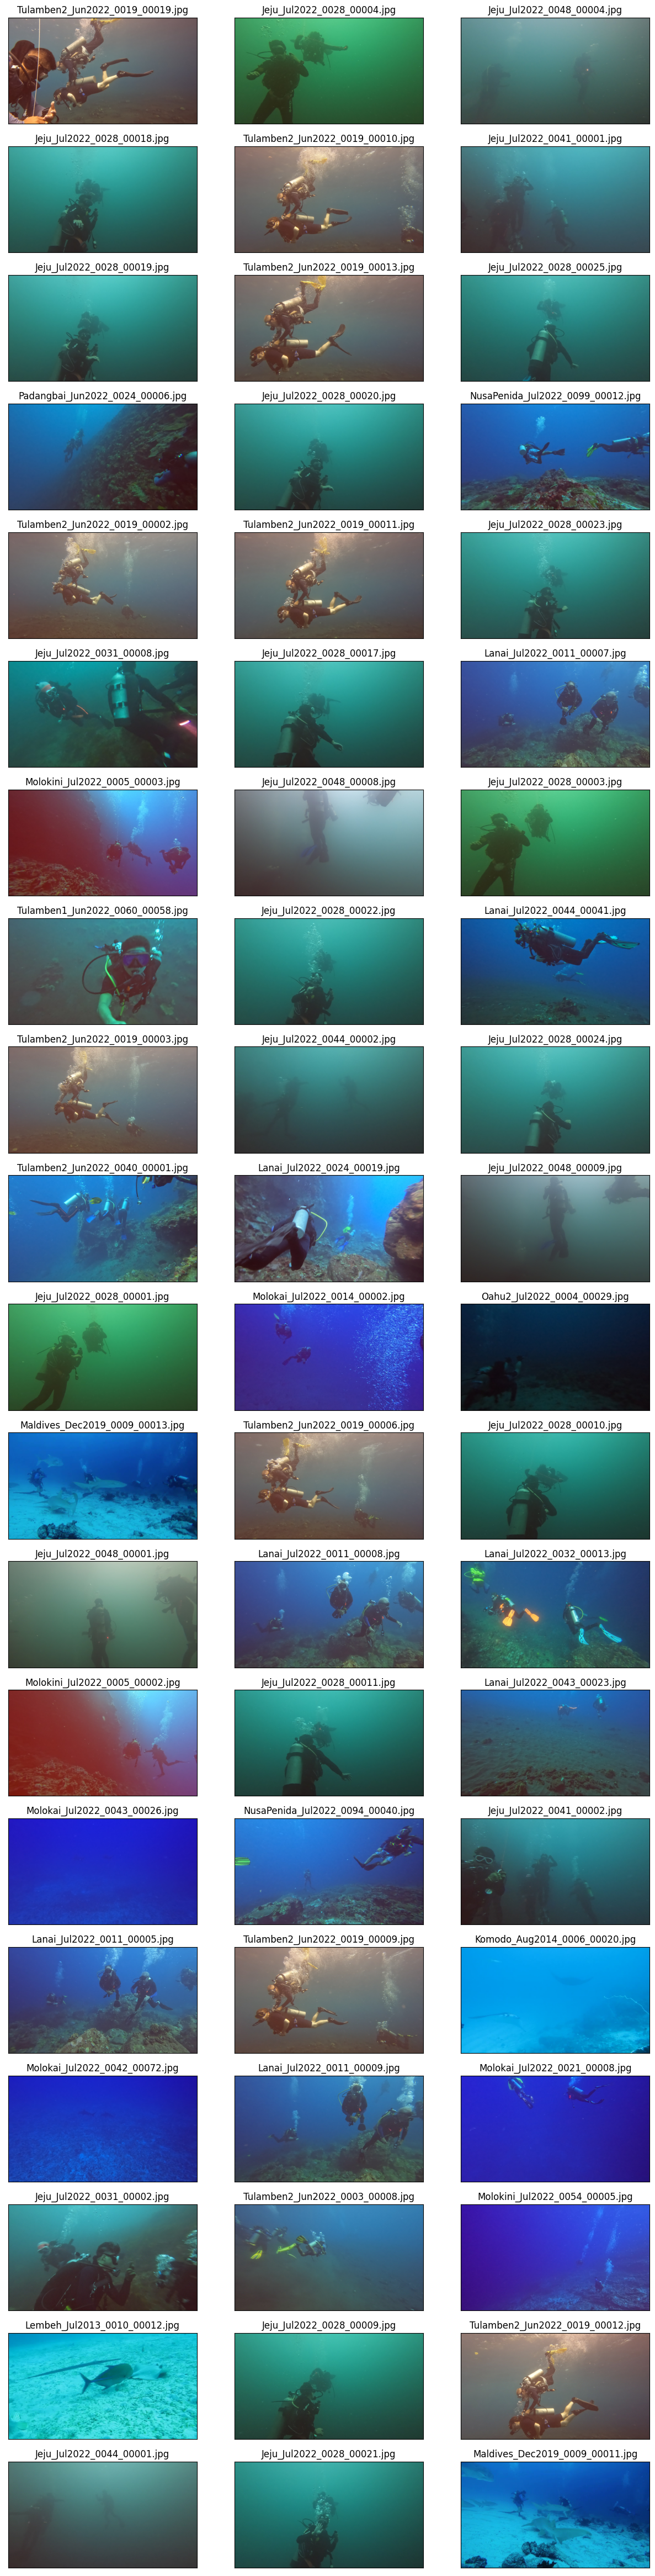

In [21]:
dataset_helpers.display_results(best_images[:100], figsize=(15, 60), subplot_size=(20,3))

### V3C Dataset

In [4]:
vbs_path = '/mnt/shared_48tb/vbs/VBS2022/metadata'

In [5]:
image_names = joblib.load(osp.join(vbs_path, 'image_names.joblib'))

In [6]:
len(image_names)

2508110

In [13]:
temp = [x[12:] for x in image_names]

In [16]:
helpers.save_list_to_txt(temp, '/mnt/shared_48tb/vbs/VBS2022/V3C_image_names.txt')

### ElasticSearch processing

In [4]:
# import os
# import sys 
# sys.path.append(os.path.dirname(os.getcwd())) 

# import torch
# import json
# import cv2
import helpers
# # from utils import *
from dataset_helpers import *

# from tqdm import tqdm
# from PIL import Image

#### Load objects

In [5]:

DATASET_NAME = 'V3C'
print("Dataset name: ", DATASET_NAME)
# clip = CLIPSearchEngine(src_path=DATASET_MASTER_PATH, feature_path=args.feature_path, batch_size=args.batch_size, generate_features=args.generate_features)
if DATASET_NAME == 'marine':
    dataset_path = osp.join(MARINE_PATH, MARINE_VIDEO_PATH)
elif DATASET_NAME == 'V3C':
    dataset_path = osp.join(V3C_KEYFRAME_DATA_PATH, 'keyframes')
src_path = osp.join(DISK_PATH, VBS_PATH)
image_name_path = osp.join(src_path, f'{DATASET_NAME}_filenames.txt')

    
data = dataset(dataset_name=DATASET_NAME, src_path=src_path, dataset_path=dataset_path, image_name_path=image_name_path)
data.get_file_name()
print(len(data.image_names))

#     # Model
#     model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5_models/yolov5m.pt')


        

Dataset name:  V3C
Loading all image names ...
/mnt/shared_48tb/vbs/V3C_filenames.txt
2508110


In [42]:
# Gather color features
color_path = '/mnt/shared_48tb/vbs/VBS2022/dominant_colors/keyframes/'

color_dict = {}
for video in tqdm(range(1, 17236)):
    color_curr_path = osp.join(color_path, '%05.f' % video, 'result.txt')
    concept = helpers.load_txt(color_curr_path)
    for frame in concept:
        frame_info = frame.split('::')
        filename = helpers.convert_to_concepts(frame_info[0])['filename']
        color_dict[filename] = frame_info[1].strip().split(',')

# Gather ocr features
ocr_path = '/mnt/shared_48tb/vbs/VBS2022/OCR/V3C.json'
ocr_dict = helpers.load_json(ocr_path)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17235/17235 [01:17<00:00, 221.51it/s]


In [43]:
data_dict = []
for item in tqdm(data.image_names):
    concepts = helpers.convert_to_concepts(item, dataset_name=DATASET_NAME)
    filename = concepts['filename']
#         # print(concepts)
    label_curr_path = osp.join(MASTER_PATH, 'VBS2023/VideoCLIP-VBS2023', 'object_detection/labels', DATASET_NAME, concepts['video'])
    # color_curr_path = osp.join(color_path, concepts['video'], 'result.txt')
    yolo_concept = helpers.load_json(osp.join(label_curr_path, '{0}.json'.format(filename)))
    concepts['yolo_concept'] = helpers.count_objects(yolo_concept)
    concepts['color'] = color_dict[filename]
    concepts['ocr'] = [ocr_dict[filename] if filename in ocr_dict else ""] 
    
    data_dict.append(concepts)
                 
#         image_curr_path = osp.join(MASTER_PATH, 'VBS2023/VideoCLIP-VBS2023', 'object_detection/images', DATASET_NAME, concepts['video'])
#         detection = model(item) 
#     #    temp = detection.save(image_curr_path)
#         bbox = detection.pandas().xyxy[0]
#         try:
#             if not os.path.exists(label_curr_path):
#                 os.makedirs(label_curr_path)
#             helpers.save_df_to_json(bbox, osp.join(label_curr_path, '{0}.json'.format(concepts['filename'])))
#         except:
#             print(item)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2508110/2508110 [03:33<00:00, 11736.21it/s]


In [44]:
helpers.save_dict_to_json(data_dict, '/mnt/shared_48tb/vbs/master_metadata.json')